In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
x = df[['MedInc']]
y = df['MedHouseVal']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [5]:
bias = np.ones((x_train.shape[0],1))
features = x_train.values
x_train_np = np.c_[bias , features]
x_train_np

array([[1.    , 3.8372],
       [1.    , 8.0069],
       [1.    , 3.6712],
       ...,
       [1.    , 2.9344],
       [1.    , 5.7192],
       [1.    , 2.5755]])

In [6]:
y_train_np = y_train.values.reshape(-1,1)
y_train_np

array([[1.564],
       [4.268],
       [3.086],
       ...,
       [2.221],
       [2.835],
       [3.25 ]])

In [8]:
w = np.linalg.inv(x_train_np.T @ x_train_np)@ x_train_np.T@y_train_np
w

array([[0.43930641],
       [0.42070233]])

In [9]:
x_test_np = np.c_[np.ones(x_test.shape[0]),x_test.values]
y_pred = x_test_np @ w

In [11]:
from sklearn.metrics import mean_squared_error , r2_score

In [12]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test,y_pred)

In [13]:
print("mean squre error:",mse)
print("r2 error:",r2)


mean squre error: 0.7306836123487029
r2 error: 0.4521007156901461


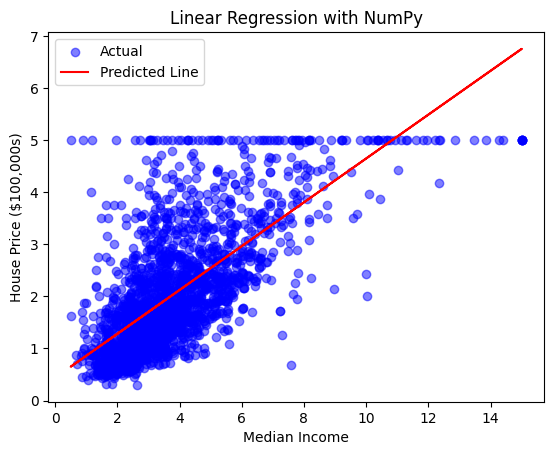

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted Line')
plt.xlabel("Median Income")
plt.ylabel("House Price ($100,000s)")
plt.title("Linear Regression with NumPy")
plt.legend()
plt.show()
